In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df = pd.read_csv("Downloads//calories.csv")

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [39]:
df.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [40]:
df.duplicated().any()

False

In [41]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [42]:
df=df.drop(columns=['User_ID'])

In [43]:
X = df.drop(columns=['Calories'])  
y = df['Calories']
  
X_train, X_test, y_train, y_test = train_test_split(X,y , 
                                   random_state=104,  
                                   test_size=0.2,  
                                   shuffle=True) 

In [44]:
categorical_cols = ['Gender']
numeric_cols=['Duration', 'Heart_Rate', 'Body_Temp', 'Age', 'Weight', 'Height']

## EDA (Training Set)

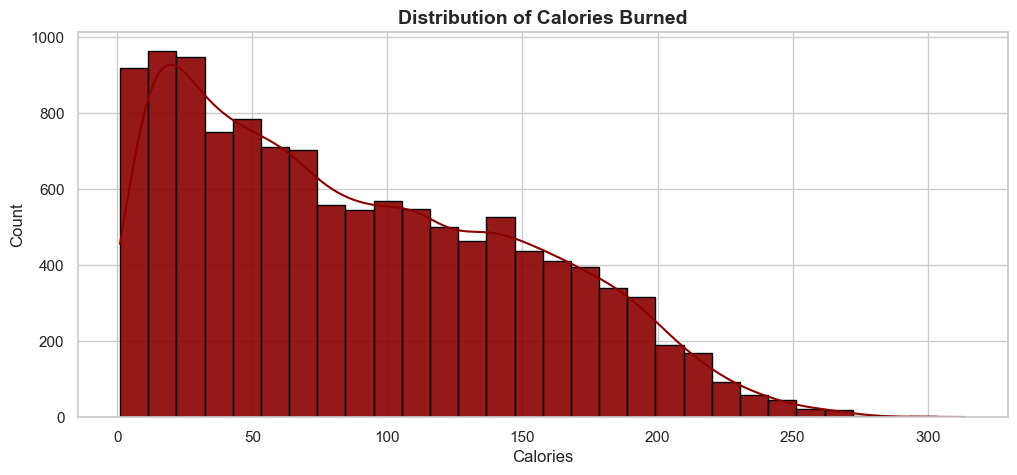

In [45]:
# Histogram for Calories
plt.figure(figsize=(12, 5))
sns.histplot(y_train, bins=30, kde=True, color='darkred', edgecolor="black", alpha=0.9)
plt.title("Distribution of Calories Burned", fontsize=14, fontweight='bold')
plt.xlabel("Calories")
plt.ylabel("Count")
plt.show()

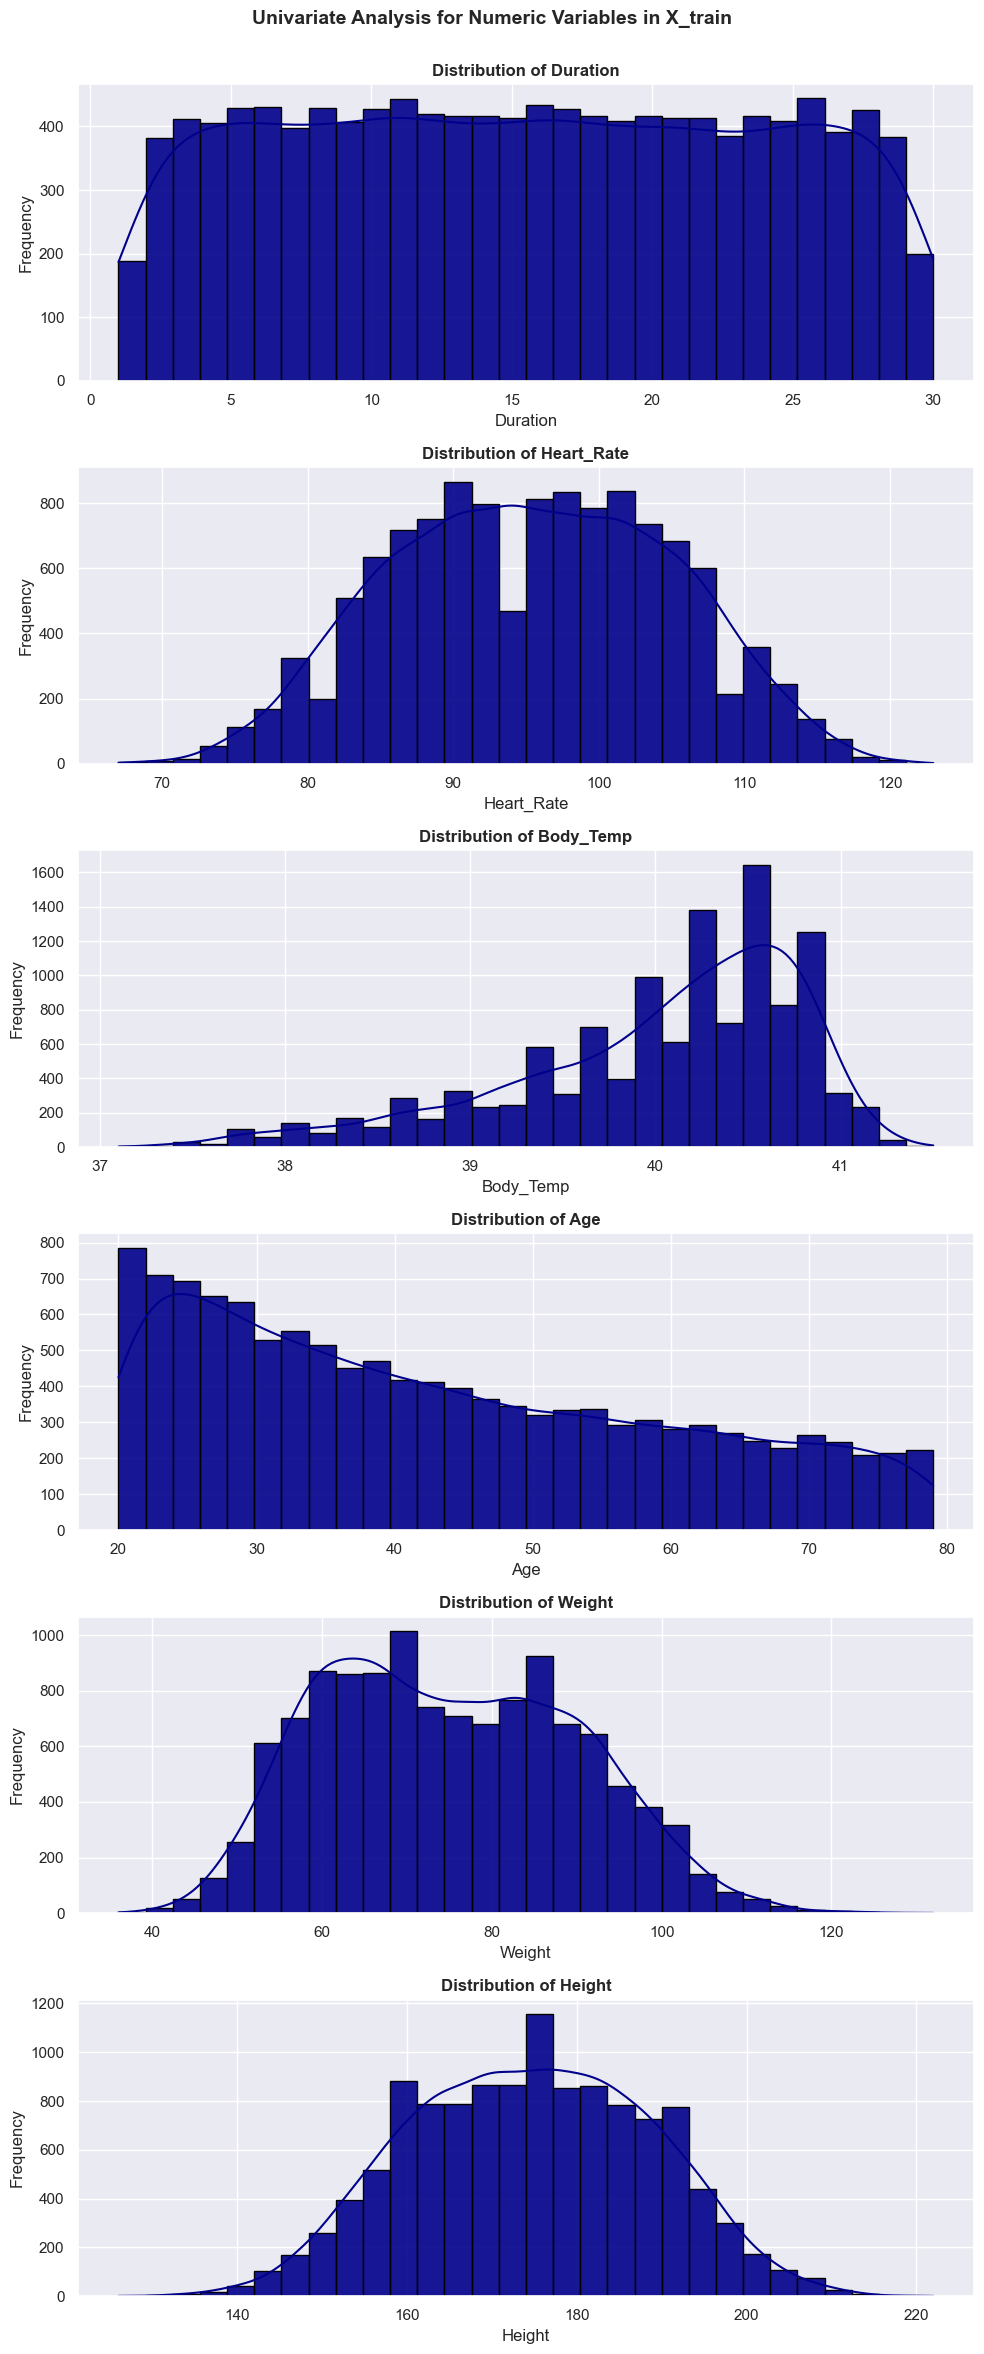

C:\Users\sadin\AppData\Local\Temp\ipykernel_19720\1982854155.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=X_train['Gender'], palette="Blues_d")


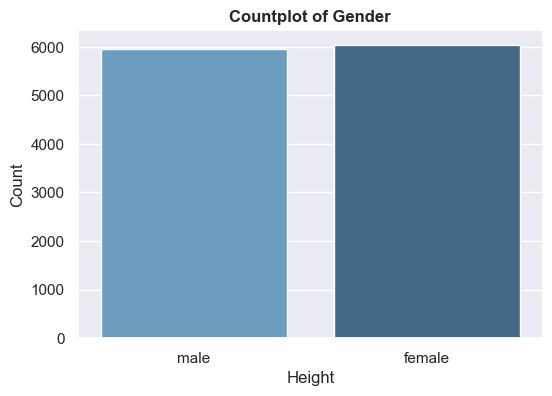

In [46]:
# Set dark theme
sns.set(style="darkgrid")


# Univariate Analysis for Numeric Variables in X_train
fig, axes = plt.subplots(len(numeric_cols), 1, figsize=(10, 4 * len(numeric_cols)))
fig.suptitle("Univariate Analysis for Numeric Variables in X_train", fontsize=14, fontweight='bold')

for i, col in enumerate(numeric_cols):
    sns.histplot(X_train[col], bins=30, kde=True, ax=axes[i], color="darkblue", edgecolor="black", alpha=0.9)
    axes[i].set_title(f"Distribution of {col}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.98])
#plt.savefig("univariate_numeric_X_train.png")  # Save figure
plt.show()

# Bar plot for gender
plt.figure(figsize=(6, 4))
sns.countplot(x=X_train['Gender'], palette="Blues_d")
plt.title(f"Countplot of Gender", fontsize=12, fontweight='bold')
plt.xlabel(col)
plt.ylabel("Count")
#plt.savefig(f"univariate_categorical_Gender.png")  # Save figure
plt.show()



C:\Users\sadin\AppData\Local\Temp\ipykernel_19720\488685418.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=X_train['Gender'], y=y_train, palette='pastel')


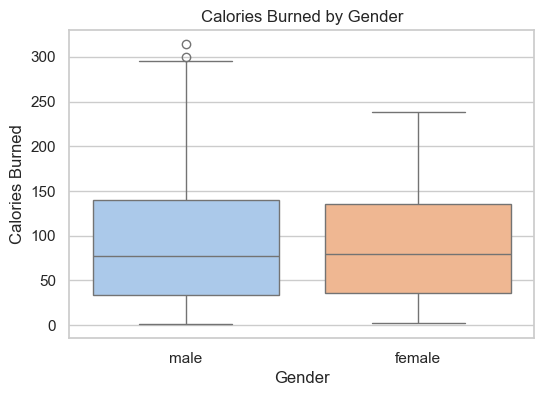

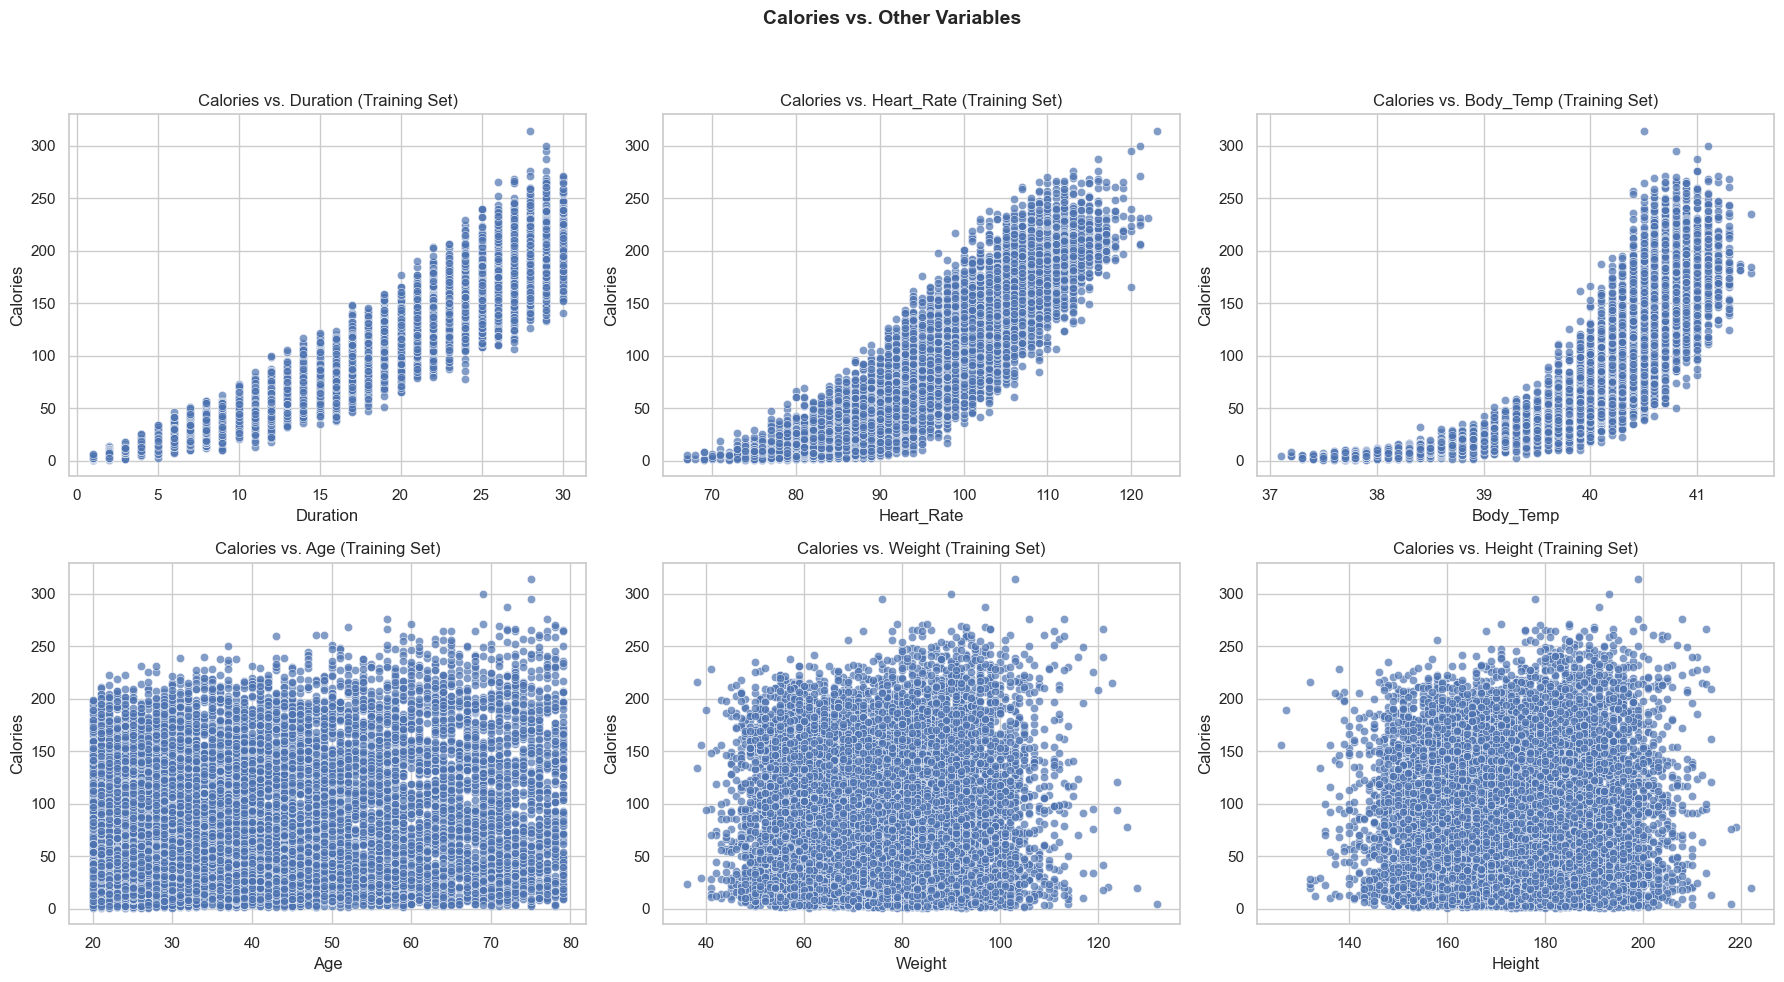

In [47]:
sns.set(style="whitegrid")

#Calories vs. Categorical Variable (Gender) in X_train
plt.figure(figsize=(6, 4))
sns.boxplot(x=X_train['Gender'], y=y_train, palette='pastel')
plt.title("Calories Burned by Gender")
plt.xlabel("Gender")
plt.ylabel("Calories Burned")
plt.savefig("calories_vs_gender.png", bbox_inches='tight') 
plt.show()

# Scatterplots in X_train
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Calories vs. Other Variables", fontsize=14, fontweight='bold')

for idx, col in enumerate(numeric_cols):
    row, col_idx = divmod(idx, 3)
    sns.scatterplot(x=X_train[col], y=y_train, alpha=0.7, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f"Calories vs. {col} (Training Set)")
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel("Calories")

plt.tight_layout(rect=[0, 0, 1, 0.95])
#plt.savefig("calories_vs_numeric_variables.png", bbox_inches='tight') 
plt.show()

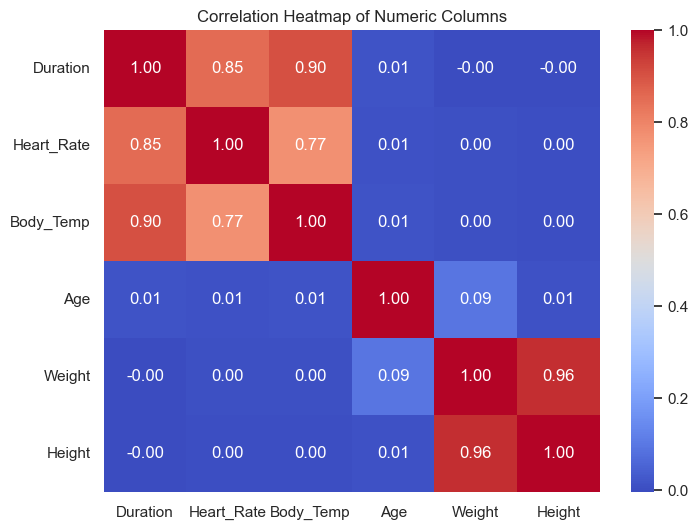

In [48]:
correlation_matrix = df[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)

plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

## Outlier detection

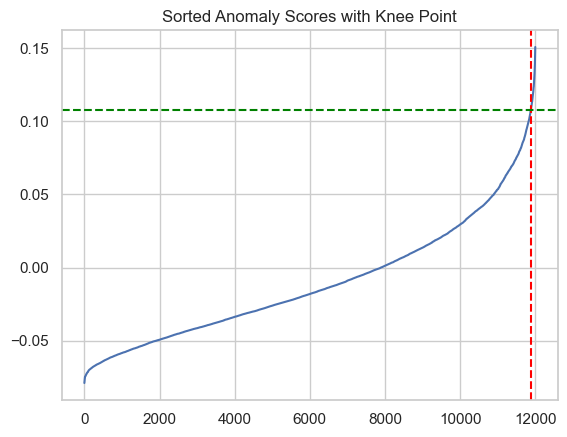

In [49]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from kneed import KneeLocator

# Preprocessor and pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),  
        ('num', 'passthrough', numeric_cols)
    ]
)

iso_forest = IsolationForest(contamination='auto', random_state=42)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('iso_forest', iso_forest)
])

# Fit the pipeline
pipeline.fit(X_train)

# Get transformed features and scores
X_transformed = pipeline.named_steps['preprocessor'].transform(X_train)
scores = -pipeline.named_steps['iso_forest'].decision_function(X_transformed)

# Find knee point
sorted_scores = np.sort(scores)
knee = KneeLocator(range(len(sorted_scores)), sorted_scores, curve='convex', direction='increasing')
threshold = sorted_scores[knee.knee]
outliers = scores >= threshold

# Visualize scores
plt.plot(sorted_scores)
plt.axvline(knee.knee, color='red', linestyle='--')
plt.axhline(threshold, color='green', linestyle='--')
plt.title("Sorted Anomaly Scores with Knee Point")
plt.grid(True)
plt.show()

In [50]:
outlier_count = np.sum(outliers)
print(f"Number of Outliers: {outlier_count}")

Number of Outliers: 120
